INFO:clustering_pipeline:Data loaded successfully from the database.



The optimal number of clusters is: 7 with a silhouette score of 0.8823596744466179

K-Means Cluster 0:

Number of users in cluster: 510

Common privileges (present in over 50% of users):
Aebleroed-IIV01-7570             100.000000
Email Authentication             100.000000
Fasit_Forsikredeledige           100.000000
Fasit_Ressourceteam              100.000000
ScanJour_Administrator           100.000000
IDC-AppDashboard-User            100.000000
ScanJour_Læse adgang - GRØN      100.000000
ScanJour_Læse adgang - GUL       100.000000
ScanJour_Skrive adgang - GUL     100.000000
ScanJour_Mailling list - GUL     100.000000
ScanJour_Mailling list - RØD     100.000000
ScanJour_Skrive adgang - GRØN    100.000000
ServiceDesk Nyhedsbrev           100.000000
ScanJour_Skrive adgang - RØD     100.000000
ServiceDesk User                 100.000000
Fasit_Fleksjob                    97.254902
dtype: float64

Top 5 privileges in the cluster:
Fasit_Forsikredeledige    100.0
Email Authentication      1

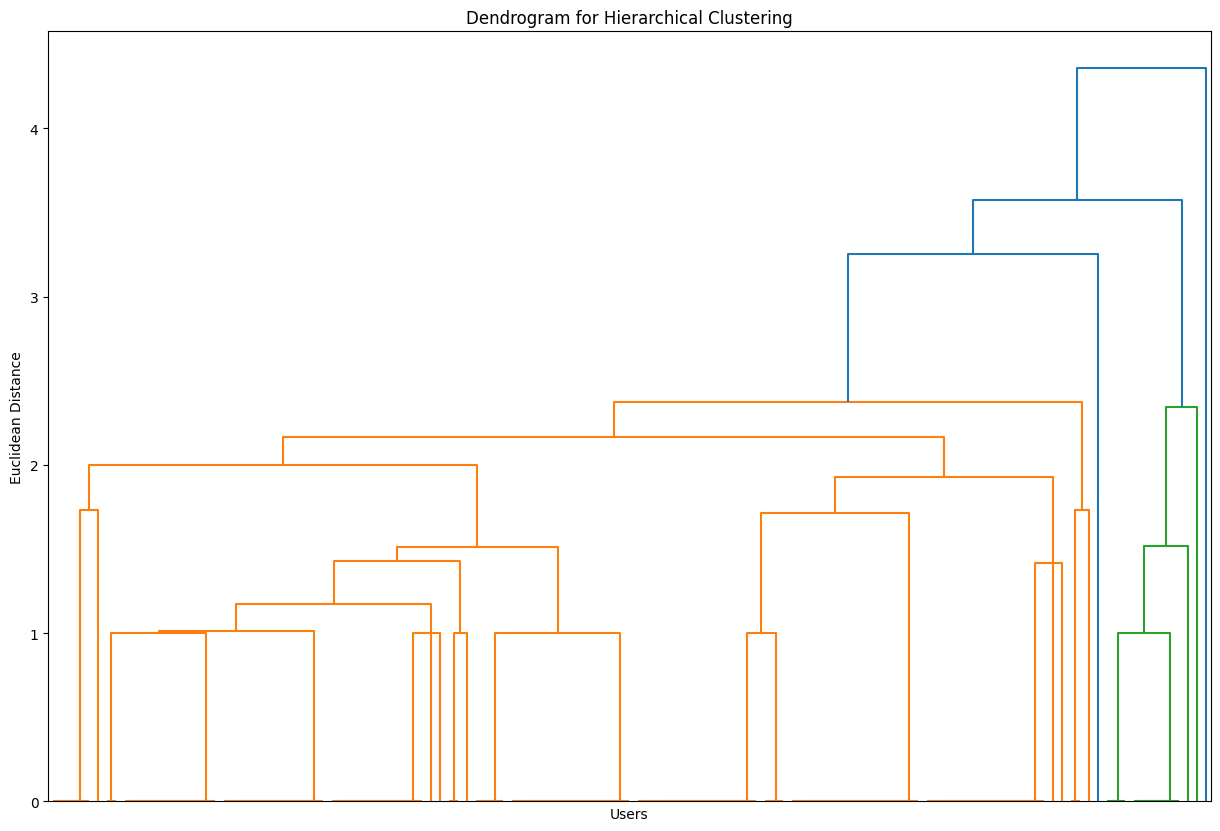

In [1]:
from connect import db_name
from clustering_pipeline import fetch_data, run_pipeline

# Main pipeline execution
sql_query = f"""
    SELECT 
        urm.user_id,
        sr.name AS system_role_name
    FROM 
        {db_name}.user_roles_mapping urm
    JOIN 
        {db_name}.system_role_assignments sra ON urm.user_role_id = sra.user_role_id
    JOIN 
        {db_name}.system_roles sr ON sra.system_role_id = sr.id;
"""

# Execute the data fetching process
df = fetch_data(sql_query)

run_pipeline(df)